In [1]:
import pandas as pd
from tabulate import tabulate
# 지하철시간대별이용현황
df= pd.read_excel('subway.xls', sheet_name='지하철 시간대별 이용현황', header=[0, 1])
print(df.head())

                 사용월                호선명                역ID               지하철역  \
  Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1 Unnamed: 3_level_1   
0            2024-06                1호선                150                서울역   
1            2024-06                1호선                151                 시청   
2            2024-06                1호선                152                 종각   
3            2024-06                1호선                153               종로3가   
4            2024-06                1호선                154               종로5가   

  04:00:00~04:59:59     05:00:00~05:59:59        06:00:00~06:59:59          \
                 승차  하차                승차     하차                승차      하차   
0               654  20             8,727  9,083            13,812  56,637   
1                74   0             2,105  5,374             4,050  25,949   
2               132   7             4,291  5,787             4,312  32,747   
3               206  13             4,296 

In [2]:
print(df.columns)

MultiIndex([(              '사용월',  'Unnamed: 0_level_1'),
            (              '호선명',  'Unnamed: 1_level_1'),
            (              '역ID',  'Unnamed: 2_level_1'),
            (             '지하철역',  'Unnamed: 3_level_1'),
            ('04:00:00~04:59:59',                  '승차'),
            ('04:00:00~04:59:59',                  '하차'),
            ('05:00:00~05:59:59',                  '승차'),
            ('05:00:00~05:59:59',                  '하차'),
            ('06:00:00~06:59:59',                  '승차'),
            ('06:00:00~06:59:59',                  '하차'),
            ('07:00:00~07:59:59',                  '승차'),
            ('07:00:00~07:59:59',                  '하차'),
            ('08:00:00~08:59:59',                  '승차'),
            ('08:00:00~08:59:59',                  '하차'),
            ('09:00:00~09:59:59',                  '승차'),
            ('09:00:00~09:59:59',                  '하차'),
            ('10:00:00~10:59:59',                  '승차'),
            ('

In [3]:
print(df[('호선명', 'Unnamed: 1_level_1')])

0      1호선
1      1호선
2      1호선
3      1호선
4      1호선
      ... 
617    신림선
618    신림선
619    신림선
620    신림선
621    신림선
Name: (호선명, Unnamed: 1_level_1), Length: 622, dtype: object


In [4]:
print(df[('지하철역', 'Unnamed: 3_level_1')])

0           서울역
1            시청
2            종각
3          종로3가
4          종로5가
         ...   
617          당곡
618          신림
619          서원
620     서울대벤처타운
621    관악산(서울대)
Name: (지하철역, Unnamed: 3_level_1), Length: 622, dtype: object


In [5]:
commute_time_df= df.iloc[:, [1, 3, 10, 12, 14]]
print(tabulate(commute_time_df.head(), headers='keys', tablefmt='psql'))

+----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------+
|    | ('호선명', 'Unnamed: 1_level_1')   | ('지하철역', 'Unnamed: 3_level_1')   | ('07:00:00~07:59:59', '승차')   | ('08:00:00~08:59:59', '승차')   | ('09:00:00~09:59:59', '승차')   |
|----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------|
|  0 | 1호선                              | 서울역                               | 40,205                          | 68,945                          | 68,501                          |
|  1 | 1호선                              | 시청                                 | 7,703                           | 10,616                          | 12,972                          |
|  2 | 1호선                              | 종각                                 | 6,588             

In [6]:
print(commute_time_df.dtypes)

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                    object
08:00:00~08:59:59  승차                    object
09:00:00~09:59:59  승차                    object
dtype: object


In [7]:
commute_time_df[('07:00:00~07:59:59', '승차')] = commute_time_df[('07:00:00~07:59:59', '승차')].apply(lambda x : x.replace(',',''))
commute_time_df[('08:00:00~08:59:59', '승차')] = commute_time_df[('08:00:00~08:59:59', '승차')].apply(lambda x : x.replace(',',''))
commute_time_df[('09:00:00~09:59:59', '승차')] = commute_time_df[('09:00:00~09:59:59', '승차')].apply(lambda x : x.replace(',',''))
print(tabulate(commute_time_df.head(), headers='keys', tablefmt='psql'))

+----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------+
|    | ('호선명', 'Unnamed: 1_level_1')   | ('지하철역', 'Unnamed: 3_level_1')   |   ('07:00:00~07:59:59', '승차') |   ('08:00:00~08:59:59', '승차') |   ('09:00:00~09:59:59', '승차') |
|----+------------------------------------+--------------------------------------+---------------------------------+---------------------------------+---------------------------------|
|  0 | 1호선                              | 서울역                               |                           40205 |                           68945 |                           68501 |
|  1 | 1호선                              | 시청                                 |                            7703 |                           10616 |                           12972 |
|  2 | 1호선                              | 종각                                 |                   

C:\Users\KDP-48\AppData\Local\Temp\ipykernel_1380\1976621172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_time_df[('07:00:00~07:59:59', '승차')] = commute_time_df[('07:00:00~07:59:59', '승차')].apply(lambda x : x.replace(',',''))
C:\Users\KDP-48\AppData\Local\Temp\ipykernel_1380\1976621172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commute_time_df[('08:00:00~08:59:59', '승차')] = commute_time_df[('08:00:00~08:59:59', '승차')].apply(lambda x : x.replace(',',''))
C:\Users\KDP-48\AppData\Local\

In [8]:
commute_time_df= commute_time_df.astype({('07:00:00~07:59:59', '승차'):'int64'})
commute_time_df= commute_time_df.astype({('08:00:00~08:59:59', '승차'):'int64'})
commute_time_df= commute_time_df.astype({('09:00:00~09:59:59', '승차'):'int64'})
print(commute_time_df.dtypes)

호선명                Unnamed: 1_level_1    object
지하철역               Unnamed: 3_level_1    object
07:00:00~07:59:59  승차                     int64
08:00:00~08:59:59  승차                     int64
09:00:00~09:59:59  승차                     int64
dtype: object


In [9]:
row_sum_df= commute_time_df.sum(axis=1, numeric_only=True)
passenger_number_list= row_sum_df.to_list()
print(row_sum_df)

0      177651
1       31291
2       30858
3       31532
4       31857
        ...  
617     44504
618     14843
619     43187
620     97128
621     17160
Length: 622, dtype: int64


In [10]:
max_number= row_sum_df.max(axis=0) # 해당열에서최대값찾기
print(max_number)

580615


In [11]:
max_index= row_sum_df.idxmax()
max_line, max_station= df.iloc[max_index, [1, 3]] #최대값의[1]: 호선,[3]: 지하철역명
print(f'출근시간대최대승차인원역: {max_line} {max_station} {max_number:,}명')

출근시간대최대승차인원역: 2호선 신림 580,615명


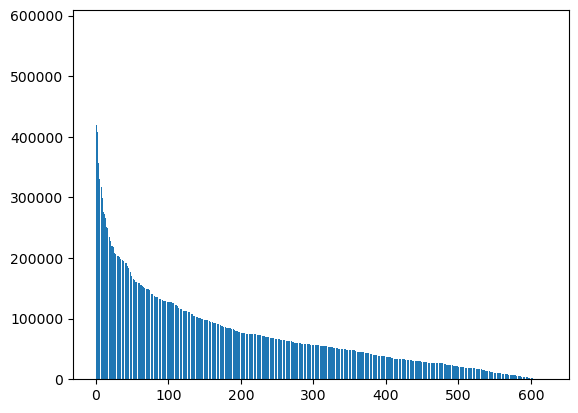

In [12]:
import matplotlib.pyplot as plt
passenger_number_list.sort(reverse=True)
plt.figure(dpi=100)
plt.bar(range(len(passenger_number_list)), passenger_number_list)
plt.show()